# Clasificación de textos: Descripción y experimentos



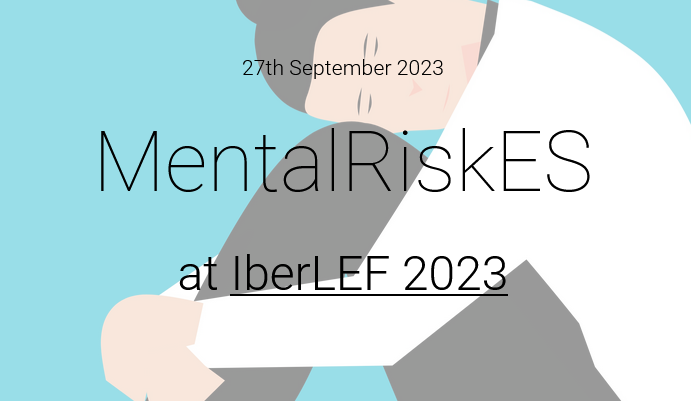

## Descripción

El problema que enfrentamos es común en el cuidado de la salud mental: identificar a las personas que pueden estar en riesgo de depresión o un trastorno alimentario en función de su uso del lenguaje. Las tareas del proyecto consisten en la detección de trastornos mentales en los usuarios a partir de sus comentarios publicados en Telegram. Dado un historial de mensajes sobre un usuario, el objetivo es identificar si el usuario padece o no el trastorno, y su actitud frente al mismo: en contra (pretende irse) o a favor (pretende continuar). Los mensajes de texto pueden ser una fuente valiosa de información para identificar a dichas personas, pero primero, Necesitamos procesar y analizar los mensajes utilizando técnicas de NLP (Natural Language Processing).

## Tokenización

La tokenización es el proceso de dividir una cadena de texto en unidades más pequeñas llamadas tokens. Los tokens pueden ser palabras, frases u otros elementos significativos. La tokenización es un paso fundamental en muchas tareas de procesamiento de lenguaje natural (NLP), como la clasificación de texto, resumen y traducción automática.

### Tipos de Tokenización

1. Tokenización por palabras: El proceso consiste en separar el texto en palabras, identificando los espacios y los signos de puntuación como límites. Además, la tokenización puede implicar la eliminación de ciertas palabras, como las comunes "stop words", que no tienen mucho significado en un contexto determinado. Tokenizar por palabras permite al modelo saltarse el paso de aprender palabras a partir de caracteres y, por tanto, reduce la complejidad del proceso de entrenamiento.

2. Tokenización por subpalabras: la idea básica detrás de la tokenización de subpalabras es combinar los mejores aspectos de la tokenización de caracteres y palabras. Por un lado, queremos dividir las palabras raras en unidades más pequeñas para permitir que el modelo se ocupe de palabras complejas y errores ortográficos. Por otro lado, queremos mantener las palabras frecuentes como entidades únicas para que podamos mantener la longitud de nuestras entradas en un tamaño manejable. La principal característica distintiva de la tokenización de subpalabras (así como la tokenización de palabras) es que se aprende del corpus previo al entrenamiento mediante una combinación de reglas y algoritmos estadísticos.


3. Tokenización por caracteres: la tokenización de caracteres es el proceso de dividir una cadena de texto en caracteres. Los caracteres son las unidades de significado más pequeñas en una cadena de texto. La tokenización de caracteres es menos común que la tokenización de palabras, pero puede ser útil para tareas como la normalización de texto y la revisión ortográfica.

### Obstáculos al usar tokenización por palabras

Una estrategia común al tokenizar por palabras es limitar el vocabulario y descartar palabras raras considerando, digamos, las 100.000 palabras más comunes en el corpus en un LLM. Las palabras que no forman parte del vocabulario se clasifican como "desconocidas" y se asignan a un token UNK compartido. Esto significa que perdemos información potencialmente importante en el proceso de tokenización de palabras, ya que el modelo no tiene información sobre las palabras asociadas con UNK. ¿No sería bueno si hubiera un compromiso entre la tokenización de caracteres y palabras que preservara toda la información de entrada y parte de la estructura de entrada? Hay tokenización de subpalabras.

La tokenización por subpalabras es la opción más óptima para la tarea en cuestión, dadas las características de los textos a clasificar.

## Proceso

Para realizar la tokenización, las tareas realizadas fueron:
1. Crear una lista de todos los archivos .txt.
2. Recorrer la lista de archivos .txt y crear un DataFrame.
3. Crear un nuevo archivo con los batches de los mensajes tokenizados.

El DataFrame ahora contendrá todos los mensajes de todos los archivos .txt y una columna con la identificación del paciente.

Primero, teniendo los archivos en el misma carpeta, pasamos los mensajes con su fecha a un archivo .txt.

In [1]:
import json
import glob
import os
import pandas as pd

In [ ]:
# Creamos una función para decodificar un string a UTF-8
def decode_string(s):
    # Decodficamos
    decoded_str = s.encode("utf-8", errors="ignore").decode("utf-8", errors="ignore")
    # Removemos cualquier caracter fuera del Basic Multilingual Plane (BMP)
    return "".join(char for char in decoded_str if ord(char) < 0x10000)

# Definimos el PATH (en este caso el script estaba en la misma carpeta de los JSON)
json_files = glob.glob("*.json")
print(json_files)
# Iteramos cada JSON
for file_path in json_files:
    # Abrimos el archivo y cargamos el contenido
    with open(file_path, "r", errors='ignore') as f:
        json_obj = json.load(f)

    # Extraemos todas las ocurrencias de "name" y "date"
    entries = [(decode_string(entry["message"]), entry["date"]) for entry in json_obj]

    # Concatenamos todo a un string
    all_entries = "\n".join(f"{name}[SEP]{date}" for name, date in entries)

    # Extraemos el nombre del json y se lo asignamos al .txt
    filename = os.path.basename(file_path).replace(".json", ".txt")

    # Creamos los archivos .txt
    with open(filename, "w", encoding='utf-8') as f:
        f.write(all_entries)

['subject10.json', 'subject104.json', 'subject140.json', 'subject138.json', 'subject1.json', 'subject101.json', 'subject139.json', 'subject102.json', 'subject100.json', 'subject131.json']


Los transferimos al DataFrame

In [ ]:
# Get the list of .txt files
txt_files = [f for f in os.listdir() if f.endswith(".txt")]

# Create an empty DataFrame
df = pd.DataFrame()

# Iterate through the .txt files
for txt_file in txt_files:

    # Get the patient ID from the file name
    patient_id = txt_file.split(".txt")[0]

    # Open the .txt file
    with open(txt_file, "r") as f:

        # Read the lines of the file
        lines = f.readlines()

        # Iterate through the lines of the file
        for line in lines:

            # Split the line into a message and a date
            message, date = line.split("[SEP]", 1)


            # Add the message and the date to the DataFrame
            df = df.append({"Patient ID": patient_id, "Message": message, "Date": date}, ignore_index=True)
            df['Date'] = df['Date'].str.replace('\n', '')


# Save the DataFrame
df.to_csv('subject_messages.csv', index=False)
#Show the DataFrame
df


Después de crear el CSV y guardarlo, lo importamos directamente.

In [7]:
df = pd.read_csv('subject_messages.csv')
df

,Patient ID,Message,Date
0,subject101,Jajaja bien y vos ? ?,2020-04-06 20:09:21
1,subject101,Toca en donde dice ana y mia,2020-04-06 20:35:02
2,subject101,Okey bien corazón rojo corazón rojo,2020-04-06 20:41:53
3,subject101,Bueno cualquier cosa ya sabes donde pedir ayuda,2020-04-06 20:48:32
4,subject101,Bueno yo me llamo candela mi edad es 14 creo q...,2020-04-06 21:13:25
...,...,...,...
384,subject131,Yo no me considero narcisista solo pregunte .,2022-02-15 19:20:32
385,subject131,Y no respondes xq consideras q ser enfermo y d...,2022-02-15 19:21:28
386,subject131,Es real q se mueren,2022-02-15 19:22:20
387,subject131,Incitan a la muerte,2022-02-15 19:22:29


Instalamos la biblioteca de Hugging Face

In [2]:
!pip install transformers

El modelo elegido es BETO. BETO es un modelo BERT entrenado con un gran corpus enespañol. BETO tiene un tamaño similar a un BERT-Base y fue entrenado con la técnica de masking de palabras completas. El link a la descripción del modelo [aquí](https://huggingface.co/dccuchile/bert-base-spanish-wwm-uncased).

### Tokenización 

In [3]:
#Importamos librerias
import torch
from transformers import AutoTokenizer, AutoModel

In [4]:
# Inicializamos el tokenizador.
model_ckpt = "dccuchile/bert-base-spanish-wwm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Creamos un JSON con los batches pertenecientes a los mensajes tokenizados.

In [66]:
# Serializing json
tokenized_messages = dict(tokenizer(df["Message"].tolist()))
json_object = json.dumps(tokenized_messages,)
 
with open('tokenized_messages.json', "w") as outfile:
    outfile.write(json_object)

Le aplicamos un mensaje al clasificador como ejemplo.

In [5]:
text= 'Okey bien botecito corazóncito'
encoded_text = tokenizer(text)

print(encoded_text)

{'input_ids': [4, 3829, 6921, 1214, 2998, 5552, 2998, 5552, 5], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


Las palabras fueron mapeadas a enteros no repetidos en el campo de `input_ids`. Teniendo dicho formato, los podemos regresar a tokns usando el método de `convert_ids_to_tokens()`. 

In [51]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'ok', '##ey', 'bien', 'corazón', 'rojo', 'corazón', 'rojo', '[SEP]']


Aquí podemos observar tres cosas. En primer lugar, se añadieron algunos tokens especiales [CLS] y [SEP] al principio y al final de la secuencia. Estos símbolos difieren de un modelo a otro modelo, pero su función principal es indicar el inicio y el final de una secuencia. En segundo lugar, los símbolos en minúsculas, una característica de este punto de control. Por último, podemos ver que "ok" y "ey" se han dividido en dos tokens, lo que tiene sentido, ya que no son palabras comunes.

## Clasificación

Para continuar con la tarea de clasificación, unimos el DataFrame de las las etiquetas y los mensajes de los sujetos para crear un único DataFrame. 

In [10]:
labels_df = pd.read_csv('task1_gold_a.txt')
labels_df

,Subject,label
0,subject1,1
1,subject10,1
2,subject100,1
3,subject101,1
4,subject102,1
5,subject104,0
6,subject131,0
7,subject138,0
8,subject139,0
9,subject140,0


In [16]:
# Join the two dataframes on the name column.
df_new = df.merge(labels_df, left_on="Patient ID", right_on="Subject")
df_new.drop(columns=['Subject'], inplace=True)

# Display the joined dataframe.
df_new

,Patient ID,Message,Date,label
0,subject101,Jajaja bien y vos ? ?,2020-04-06 20:09:21,1
1,subject101,Toca en donde dice ana y mia,2020-04-06 20:35:02,1
2,subject101,Okey bien corazón rojo corazón rojo,2020-04-06 20:41:53,1
3,subject101,Bueno cualquier cosa ya sabes donde pedir ayuda,2020-04-06 20:48:32,1
4,subject101,Bueno yo me llamo candela mi edad es 14 creo q...,2020-04-06 21:13:25,1
...,...,...,...,...
384,subject131,Yo no me considero narcisista solo pregunte .,2022-02-15 19:20:32,0
385,subject131,Y no respondes xq consideras q ser enfermo y d...,2022-02-15 19:21:28,0
386,subject131,Es real q se mueren,2022-02-15 19:22:20,0
387,subject131,Incitan a la muerte,2022-02-15 19:22:29,0


De esta manera podemos trabajar más ágilmente con la clasificación.

Modelos como DistilBERT, BERT y BETO están preentrenados para predecir palabras enmascaradas en una secuencia de texto. Sin embargo, por la arquitectura de su diseño, no podemos utilizar estos modelos directamente para la clasificación de textos; tenemos que modificarlos ligeramente.

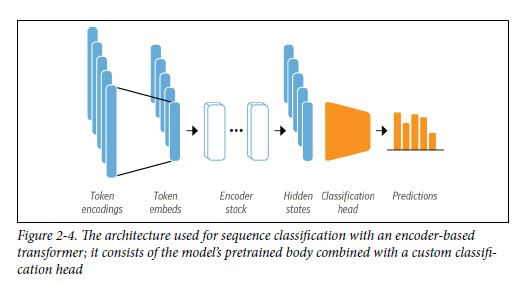

Tenemos dos opciones para entrenar un modelo de este tipo en nuestro conjunto de datos:
1. Extracción de características: Usamos los estados ocultos como características y entrenamos un clasificador con ellos, sin modificar el modelo preentrenado. modificar el modelo preentrenado.

2. Fine-tuning: Entrenamos todo el modelo de principio a fin, lo que también actualiza los parámetros del modelo preentrenado. 

### Extracción de características

Pasos

1. Extraer los hidden states.
2. Crear matriz de características
3. Ajustar clasificador

In [ ]:
model_ckpt = "dccuchile/bert-base-spanish-wwm-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

### Fine Tuning

Lo primero que necesitamos es un modelo preentrenado como el que utilizamos en el enfoque basado en características. La diferencia es que utilizaremos el modelo AutoModelForSequenceClassification en lugar de AutoModel. El modelo AutoModelForSequenceClassification tiene un head de clasificación sobre las salidas del modelo preentrenado, que puede entrenarse fácilmente con el modelo base. Sólo tenemos que especificar cuántas etiquetas tiene que predecir el modelo (dos en nuestro caso), ya que esto dicta el número de salidas que tiene la clasificación:

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = (AutoModelForSequenceClassification .from_pretrained(model_ckpt, num_labels=num_labels).to(device))

## Referencias
Natural Language Processing with Transformers: Building Language Applications with Hugging Face: Lewis Tunstall, Leandro von Werra, Thomas Wolf. (O'Reilly Media, Incorporated, 2022)
